# Light-Curves catalogs tutorial (`lc`)

This notebook give some insights about the data stored in all the `lc` types catalogs.

In [1]:
# import the module and instance the client
import carpyncho 
client = carpyncho.Carpyncho()

In [2]:
df = client.get_catalog("b214", "lc")
df.sample(3)

,bm_src_id,pwp_id,pwp_stack_src_id,pwp_stack_src_hjd,pwp_stack_src_mag3,pwp_stack_src_mag_err3
4972570,32140000315166,4687,3000468700233692,56831.181938,16.238,0.091
3578347,32140000347620,4672,3000467200298695,56744.307884,17.478,0.217
11315958,32140000419262,4709,3000470900413356,56816.209997,17.405,0.170


The columns of this catalog are

In [3]:
print(list(df.columns))

['bm_src_id', 'pwp_id', 'pwp_stack_src_id', 'pwp_stack_src_hjd', 'pwp_stack_src_mag3', 'pwp_stack_src_mag_err3']


Where

- **bm_src_id** (Band-Merge Source ID): This is the unique identifier of every light curve. The records with the same *bm_src_id* are part of the same lc (This id is part of Carpyncho internal and is unique for every source).
- **pwp_id** (Pawprint Stack ID):  The id of the pawprint where this point of the light curve is located (This id is part of Carpyncho internal database).
- **pwp_stack_src_id** (Pawprint Stack Source ID):  The id of this particular observation inside the pawprint where this point (This id are part of Carpyncho internal database) 
- **pwp_stack_src_hjd** (Pawprint Stack Source HJD): The Heliocentric-Julian-Date of this particular observation.
- **pwp_stack_src_mag3** (Pawprint Stack Source Magnitude of the 3rd Aperture): The magnitude (of the 3rd aperture) of this particular observation.
- **pwp_stack_src_mag_err3** (Pawprint Stack Source Magnitude Error of the 3rd Aperture): The magnitude error (of the 3rd aperture) of this particular observation.

## Retrieve a single light-curve

Lets, for example, retrieve the LC with the ID `32140000349109` and sort by time

In [4]:
lc = df[df.bm_src_id == 32140000349109]
lc = lc.sort_values("pwp_stack_src_hjd")
lc

,bm_src_id,pwp_id,pwp_stack_src_id,pwp_stack_src_hjd,pwp_stack_src_mag3,pwp_stack_src_mag_err3
9824315,32140000349109,4705,3000470500316153,55301.355623,15.736,0.045
15823573,32140000349109,4713,3000471300371137,55404.204420,15.705,0.040
17889825,32140000349109,4719,3000471900344310,55435.200224,15.734,0.042
15383198,32140000349109,4711,3000471100264253,55497.035605,15.868,0.061
7230797,32140000349109,4694,3000469400252478,55806.201062,15.795,0.060
...,...,...,...,...,...,...
17498325,32140000349109,4718,3000471800253351,57248.183650,15.750,0.050
20689532,32140000349109,4728,3000472800102886,57251.230468,15.828,0.099
7873271,32140000349109,4697,3000469700250665,57252.177815,15.727,0.050
12365892,32140000349109,4677,3000467700294240,57265.086562,15.773,0.055


Great, 67 epochs. Let's check the average and dispersion of the magnitudes and the error

In [5]:
lc[['pwp_stack_src_mag3', 'pwp_stack_src_mag_err3']].mean()

pwp_stack_src_mag3        15.759224
pwp_stack_src_mag_err3     0.051299
dtype: float64

In [6]:
lc[['pwp_stack_src_mag3', 'pwp_stack_src_mag_err3']].std()

pwp_stack_src_mag3        0.044732
pwp_stack_src_mag_err3    0.009130
dtype: float64

The source is stable, now check the observation range

In [7]:
print((lc.pwp_stack_src_hjd.max() - lc.pwp_stack_src_hjd.min()) / 365, "Years")

5.426589796388058 Years


Finally we can plot the entire LC

In [8]:
import matplotlib.pyplot as plt

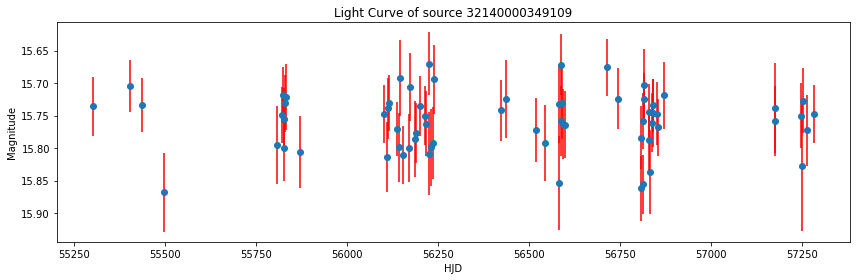

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.errorbar(
    lc.pwp_stack_src_hjd, 
    lc.pwp_stack_src_mag3, 
    lc.pwp_stack_src_mag_err3, 
    ls="", marker="o", ecolor="red")

ax.set_title(f"Light Curve of source 32140000349109")
ax.set_ylabel("Magnitude")
ax.set_xlabel("HJD")

ax.invert_yaxis()
fig.tight_layout()

In [10]:
import datetime as dt
dt.datetime.now()

datetime.datetime(2020, 4, 24, 1, 41, 17, 21921)